In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [21]:
im=cv2.imread("elephant.jpg")
print(im.shape)

(1200, 1920, 3)


In [22]:
x_=im.shape[0]
y_=im.shape[1]
print(x_,y_)

1200 1920


(1200, 1920, 3)


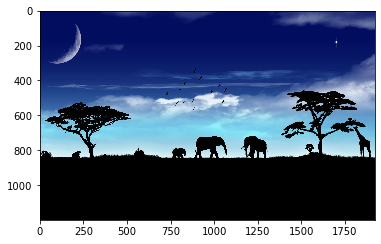

In [23]:
plt.imshow(im)
new_im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
origianlshape=new_im.shape
print(origianlshape)

### original image

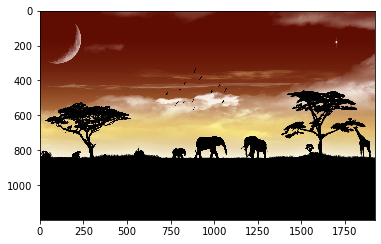

In [26]:
plt.imshow(new_im)
plt.show()

### flatten each channel of the image

In [27]:
pixels=new_im.reshape((-1,3))

# making one linear array for each RGB value(of size m*n)
# number of channel remains the same 

In [28]:
print(pixels.shape)

(2304000, 3)


In [29]:
from sklearn.cluster import KMeans


In [30]:
dominant_colors=4
kmeans=KMeans(n_clusters=dominant_colors)
kmeans.fit(pixels)


    ##in this picture there are many colours present so we are extracting 4 dominant colours from it
    ## here 4 dominant colors the different cluster made in this picture 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
centers=kmeans.cluster_centers_ 

In [32]:
centers=np.array(centers,dtype='uint8') ## centers are in float therefore we convert it into integer

In [33]:
print(centers)

[[  0   0   0]
 [225 199 147]
 [103  23   8]
 [145  82  54]]


## plotting all the colors we have extracted 

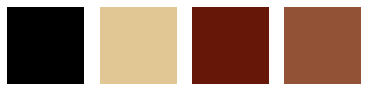

In [34]:
i=1
colors=[]
plt.figure(0,(8,2))
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i +=1
    colors.append(each_col)
    
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')   # creating a matrix and then adding each color to the matrix 
                                            # and then displaying it
    a[:,:,:]=each_col
    
    plt.imshow(a)
    
plt.show()


## and we get the four most dominant colors from the image 

In [37]:
print(colors[1])

[225 199 147]


# segmeanting our original image

In [41]:
new_image=np.zeros((x_*y_,3),dtype='uint8')  ## shape same of original image 
print(new_image.shape)

(2304000, 3)


In [42]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

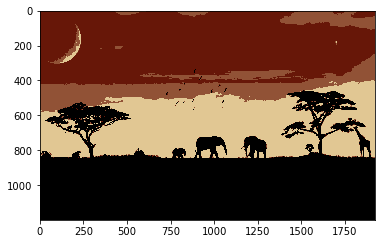

In [43]:
for ix in range(new_image.shape[0]): ## for every integer in image 
    new_image[ix]=colors[kmeans.labels_[ix]]  ## extracted a label for every pixel in the image
    
    ## for each of the integer of the image there will be a label predicted by kmeans
    
new_image=new_image.reshape((origianlshape))
plt.imshow(new_image)
plt.show()
    
    

### this is our extracted image consisting of dominant colors

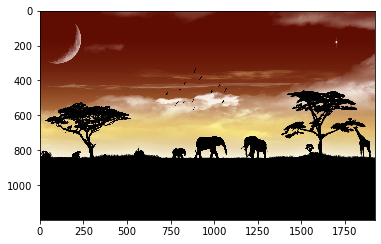

In [44]:
plt.imshow(new_im)
plt.show()

## original image